In [1]:
import opendatasets as od
import pandas as pd
import torch

download = False

if download:
    od.download("https://www.kaggle.com/datasets/capcloudcoder/us-wildfire-data-plus-other-attributes/data")
    df = pd.read_csv("us-wildfire-data-plus-other-attributes/FW_Veg_Rem_Combined.csv")
    df = df[["fire_size", "fire_size_class", "latitude", "longitude", "disc_clean_date", "discovery_month", "disc_date_pre", "dstation_m", "Vegetation", *df.columns[26:]]]
else:
    df = pd.read_csv("us-wildfire-data.csv")

In [2]:
df

,fire_size,fire_size_class,latitude,longitude,disc_clean_date,discovery_month,disc_date_pre,dstation_m,Vegetation,Temp_pre_30,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,10.0,C,18.105072,-66.753044,2/11/2007,Feb,1/12/2007,58917.697160,12,24.480974,...,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,3.0,B,35.038330,-87.610000,12/11/2006,Dec,11/11/2006,32665.343270,15,7.553433,...,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,60.0,C,34.947800,-88.722500,2/29/2004,Feb,1/30/2004,105122.149500,16,4.971930,...,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,1.0,B,39.641400,-119.308300,6/6/2005,Jun,5/7/2005,43433.329780,0,16.275967,...,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,2.0,B,30.700600,-90.591400,9/22/1999,Sep,8/23/1999,25940.574090,12,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55362,6289.0,G,39.180000,-96.784167,10/15/2015,Oct,9/15/2015,9004.604868,0,19.720799,...,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
55363,70868.0,G,38.342719,-120.695967,9/9/2015,Sep,8/10/2015,22236.095780,0,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.124683
55364,5702.0,G,37.262607,-119.511139,7/25/2015,Jul,6/25/2015,64987.396810,0,28.425403,...,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682
55365,3261.0,F,40.604300,-123.080450,7/31/2015,Jul,7/1/2015,53219.630130,15,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.178206


In [3]:
df.describe()

,fire_size,latitude,longitude,dstation_m,Vegetation,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,...,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
count,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,...,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000,55367.000000
mean,2104.645161,36.172866,-94.757971,40256.474678,11.066068,10.688533,10.800765,10.907171,7.838208,1.926108,...,1.132284,40.781796,38.453935,37.001865,25.056738,26.277046,11.654253,4.689920,15.590440,0.236799
std,14777.005364,6.724348,15.878194,25272.081410,5.595719,10.467579,10.633803,10.807985,10.565555,2.106165,...,2.030611,31.086856,31.042541,30.827885,31.187638,112.050198,56.920510,31.205327,59.757113,0.144865
min,0.510000,17.956533,-165.936000,6.166452,0.000000,-49.210526,-37.000000,-20.846104,-22.750000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.200000,32.265960,-102.541513,21373.361515,9.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.137800
50%,4.000000,34.600000,-91.212359,35621.334820,12.000000,9.945559,10.122047,10.237860,0.000000,2.422880,...,0.000000,55.657480,51.753846,48.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.202114
75%,20.000000,38.975235,-82.847500,53985.904315,15.000000,20.015591,20.259329,20.502848,17.011853,3.469751,...,2.848603,67.384352,65.911469,64.645296,60.193606,18.900000,3.600000,0.000000,0.000000,0.284782
max,606945.000000,69.849500,-65.285833,224153.661800,16.000000,46.600000,51.567797,55.000000,55.000000,29.800000,...,24.200000,96.000000,94.000000,96.000000,94.000000,13560.800000,2527.000000,1638.000000,2126.000000,1.000000


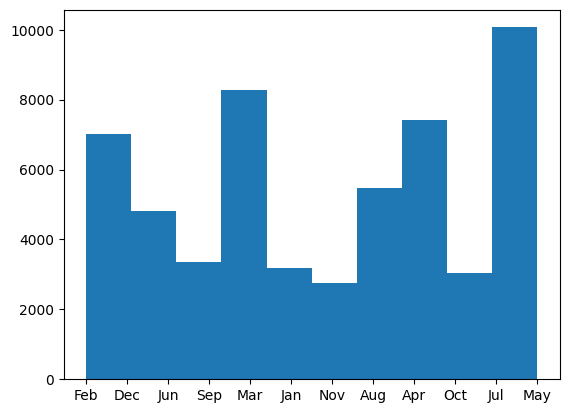

Count: 55367


In [4]:
import matplotlib.pyplot as plt
plt.hist(df["discovery_month"])
plt.show()
print("Count:", len(df["discovery_month"]))

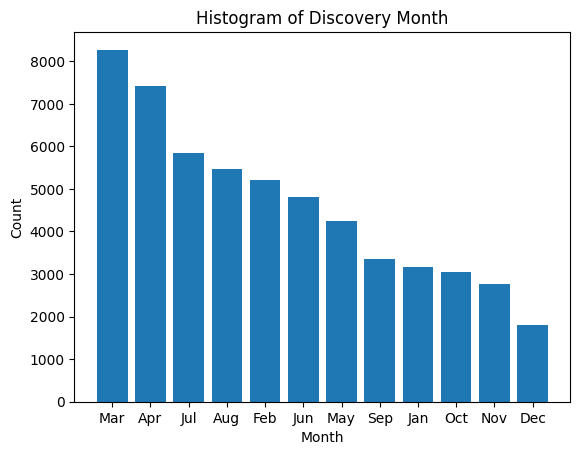

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a custom order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'discovery_month' to categorical type with custom order
df['discovery_month'] = pd.Categorical(df['discovery_month'], categories=month_order, ordered=True)

# Sort the DataFrame based on the custom order of months
df_sorted = df.sort_values(by='discovery_month')

# Create a histogram based on the count
plt.bar(df_sorted['discovery_month'].value_counts().index, df_sorted['discovery_month'].value_counts())
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Histogram of Discovery Month')
plt.show()

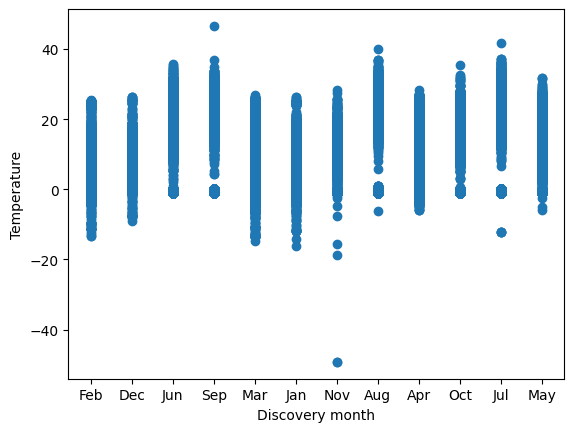

In [6]:
allcols = df.columns[9:-1]
temp = list(filter(lambda x: "Temp" in x, allcols))
df.sort_values(by='discovery_month')
plt.scatter(df['discovery_month'], df[temp[0]])
plt.xlabel("Discovery month")
plt.ylabel("Temperature")
plt.show()

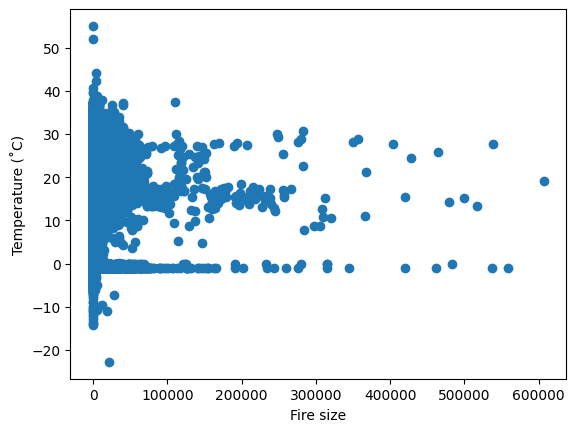

count     55367.000000
mean       2104.645161
std       14777.005364
min           0.510000
25%           1.200000
50%           4.000000
75%          20.000000
max      606945.000000
Name: fire_size, dtype: float64

In [7]:
plt.scatter(df['fire_size'].sort_values(), df['Temp_cont'])
plt.xlabel("Fire size")
plt.ylabel("Temperature (˚C)")
plt.show()

df['fire_size'].describe()

In [8]:
df[temp].describe()

,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont
count,55367.000000,55367.000000,55367.000000,55367.000000
mean,10.688533,10.800765,10.907171,7.838208
std,10.467579,10.633803,10.807985,10.565555
min,-49.210526,-37.000000,-20.846104,-22.750000
25%,-1.000000,-1.000000,-1.000000,-1.000000
50%,9.945559,10.122047,10.237860,0.000000
75%,20.015591,20.259329,20.502848,17.011853
max,46.600000,51.567797,55.000000,55.000000


In [9]:
df.iloc[:,9:26]

,Temp_pre_30,Temp_pre_15,Temp_pre_7,Temp_cont,Wind_pre_30,Wind_pre_15,Wind_pre_7,Wind_cont,Hum_pre_30,Hum_pre_15,Hum_pre_7,Hum_cont,Prec_pre_30,Prec_pre_15,Prec_pre_7,Prec_cont,remoteness
0,24.480974,24.716923,24.902597,24.527961,4.341807,3.492857,3.262092,3.250413,78.216590,76.793750,76.381579,78.724370,0.0,0.0,0.0,0.0,0.017923
1,7.553433,7.010000,0.343529,10.448298,2.709764,2.881707,1.976471,2.122320,70.840000,65.858911,55.505882,81.682678,59.8,8.4,0.0,86.8,0.184355
2,4.971930,5.782766,5.558750,13.696600,3.364499,2.923830,2.695833,3.369050,75.531629,75.868613,76.812834,65.063800,168.8,42.2,18.1,124.5,0.194544
3,16.275967,18.996181,18.142564,0.000000,4.054982,3.398329,3.671282,0.000000,44.778429,37.140811,35.353846,0.000000,10.4,7.2,0.0,0.0,0.487447
4,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.214633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55362,19.720799,16.891282,18.918994,13.242324,3.259176,2.705398,3.196648,3.804803,65.671410,61.839572,54.625698,55.042092,35.4,8.2,0.0,249.0,0.331501
55363,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.124683
55364,28.425403,28.425403,28.166667,27.646067,2.649395,2.649395,2.667722,2.529158,43.755556,43.755556,44.443975,35.924406,0.0,0.0,0.0,0.0,0.097682
55365,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,0.178206


In [10]:
from sklearn.preprocessing import StandardScaler

x = df.iloc[:,9:26]
y = df['fire_size'].to_numpy()
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y.reshape(-1, 1))

In [21]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y)

In [22]:
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

class SimpleLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleLSTM, self).__init__()
        
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, input, hidden):
        lstm_out, hidden = self.lstm(input.view(len(input), 1, -1), hidden)
        output = self.fc(lstm_out.view(len(input), -1))
        return output, hidden
    
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx].astype(np.float32), self.labels[idx].astype(np.float32)

def train(model, train_loader, criterion, optimizer, num_epochs):
    train_loss = []

    for epoch in range(num_epochs):
        total_loss = 0.0

        for i, (inputs, labels) in enumerate(train_loader):
            inputs = torch.FloatTensor(inputs)
            optimizer.zero_grad()
            outputs, _ = model(inputs, None)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        train_loss.append(total_loss)

        # Print the average loss for this epoch
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss / len(train_loader)}')

    return train_loss

model = SimpleLSTM(17, 4, 17)
loss = train(model, DataLoader(CustomDataset(train_x, train_y)), CrossEntropyLoss(), Adam(model.parameters(), lr=0.01), 2)
loss

RuntimeError: 0D or 1D target tensor expected, multi-target not supported

In [27]:
train_x

array([[ 1.00393886,  0.91321203,  0.78002166, ..., -0.10863371,
        -0.26089917, -0.56903264],
       [ 0.02131952,  0.12057018,  0.54158926, ..., -0.15029364,
         3.33703139, -0.74346126],
       [ 0.83143444,  0.76154899,  0.75108799, ..., -0.15029364,
        -0.26089917, -0.2249753 ],
       ...,
       [ 0.67231518,  0.53830402,  0.72628759, ..., -0.15029364,
        -0.26089917, -0.54091593],
       [-1.02111762, -1.01571022, -1.00918621, ..., -0.15029364,
        -0.26089917, -0.40378438],
       [-0.7165702 , -0.57162969, -0.77627839, ..., -0.15029364,
        -0.26089917, -0.05394207]])

In [28]:
train_y

array([[-0.14204936],
       [-0.12943505],
       [-0.14215763],
       ...,
       [-0.14235456],
       [-0.14229298],
       [ 0.46663156]])